In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from datetime import datetime, timedelta
import collections
import json
from textblob import TextBlob, Word
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
import time
import re

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Data Loading

In [3]:
dfs = {}

path = '../US_Datasets/Data'
for file in os.listdir(path):
    #print(file)
    df = pd.read_csv(path + '/' + file)
    date = datetime.strptime(file.split('_')[0], '%y.%d.%m').date()
    dfs[date] = df
    
dfs = collections.OrderedDict(sorted(dfs.items()))
print(dfs.keys())

odict_keys([datetime.date(2019, 12, 11), datetime.date(2019, 12, 12), datetime.date(2019, 12, 13), datetime.date(2019, 12, 14), datetime.date(2019, 12, 15), datetime.date(2019, 12, 17), datetime.date(2019, 12, 18), datetime.date(2019, 12, 19), datetime.date(2019, 12, 20), datetime.date(2019, 12, 21), datetime.date(2019, 12, 22), datetime.date(2019, 12, 23), datetime.date(2019, 12, 24), datetime.date(2019, 12, 25), datetime.date(2019, 12, 26), datetime.date(2019, 12, 27), datetime.date(2019, 12, 29), datetime.date(2019, 12, 31), datetime.date(2020, 1, 1), datetime.date(2020, 1, 2), datetime.date(2020, 1, 3), datetime.date(2020, 1, 4), datetime.date(2020, 1, 5), datetime.date(2020, 1, 6), datetime.date(2020, 1, 7), datetime.date(2020, 1, 8), datetime.date(2020, 1, 9), datetime.date(2020, 1, 10), datetime.date(2020, 1, 11), datetime.date(2020, 1, 12), datetime.date(2020, 1, 13), datetime.date(2020, 1, 14), datetime.date(2020, 1, 15), datetime.date(2020, 1, 16), datetime.date(2020, 1, 17),

In [4]:
class YTVideo:
    def __init__(self, df_row, days_in_trending=1):
        self.video_id = df_row.video_id
        self.title = df_row.title
        self.published_at = df_row.publishedAt
        self.channel_id = df_row.channelId
        self.channel_title = df_row.channelTitle
        self.category_id = df_row.categoryId
        self.trending_date = df_row.trending_date
        self.tags = df_row.tags
        self.view_count = df_row.view_count
        self.likes = df_row.likes
        self.dislikes = df_row.dislikes
        self.comment_count = df_row.comment_count
        self.thumbnail_link = df_row.thumbnail_link
        self.comments_disabled = df_row.comments_disabled
        self.ratings_disabled = df_row.ratings_disabled
        self.description = df_row.description
        self.days_in_trending = days_in_trending
        
    def __str__(self):
        retval = 'Video ID: {}\nTitle: {}\nPublished at: {}\nChannel ID: {}\nChannel title: {}\nCategory ID: {}\nTrending date: {}\nTags: {}\nView count: {}\nLikes: {}\nDislikes: {}\nComment count: {}\nThumbnail link: {}\nComments disabled: {}\nRatings disabled: {}\nDescription: {}\nDays in trending: {}\n'.format(self.video_id, self.title, self.published_at, self.channel_id, self.channel_title, self.category_id, self.trending_date, self.tags, self.view_count, self.likes, self.dislikes, self.comment_count, self.thumbnail_link, self.comments_disabled, self.ratings_disabled, self.description, self.days_in_trending)
        return retval
    
    def to_dict(self):
        return {
            'video_id': self.video_id,
            'title': self.title,
            'published_at': self.published_at,
            'channel_id': self.channel_id,
            'channel_title': self.channel_title,
            'category_id': self.category_id,
            'trending_date': self.trending_date,
            'tags': self.tags,
            'view_count': self.view_count,
            'likes': self.likes,
            'dislikes': self.dislikes,
            'comment_count': self.comment_count,
            'thumbnail_link': self.thumbnail_link,
            'comments_disabled': self.comments_disabled,
            'ratings_disabled': self.ratings_disabled,
            'description': self.description,
            'days_in_trending': self.days_in_trending
        }

In [5]:
first_day = list(dfs.values())[0].iloc[0].trending_date
last_day = list(dfs.values())[-1].iloc[0].trending_date
print('First day: {}'.format(first_day))
print('Last day: {}'.format(last_day))

videos = dict()

# u obzir dolaze videi koji su usli i izasli iz trendinga za vreme skupljanja podataka
for df in dfs.values():
    for index, row in df.iterrows():
        if row.video_id in videos:
            videos[row.video_id].days_in_trending += 1
        else:
            # provera da li video iz naseg prvog dana
            if row.trending_date != first_day and row.trending_date != last_day:
                videos[row.video_id] = YTVideo(row)

First day: 19.11.12
Last day: 20.09.04


In [6]:
print('Broj videa: {}'.format(len(videos)))

Broj videa: 4370


In [7]:
# kreiranje dataframe-a
videos_df = pd.DataFrame([video.to_dict() for video in videos.values()])

In [8]:
videos_df

,video_id,title,published_at,channel_id,channel_title,category_id,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,days_in_trending
0,vPx6M7eTYbc,Spill Your Guts: Harry Styles & Kendall Jenner,2019-12-11T07:08:34.000Z,UCJ0uqCI0Vqr2Rrt1HseGirg,The Late Late Show with James Corden,24,19.12.12,The Late Late Show|Late Late Show|James Corden...,11636632,571835,8256,20068,https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg,False,False,Late Late Show guest host Harry Styles challen...,1
1,sg8WaeeFyNY,WE GOT UNEXPECTED NEWS..,2019-12-12T05:25:42.000Z,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,19.12.12,[none],423215,52780,773,13130,https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...,7
2,q1PR05q8l2g,"Last To Miss Layup Wins $10,000",2019-12-11T23:00:53.000Z,UCQIUhhcmXsu6cN6n3y9-Pww,Jesser,17,19.12.12,last to leave|nba basketball|nba basketball hi...,463685,20178,586,931,https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg,False,False,"Last to miss the basketball shot wins 10,000!●...",7
3,t6Z6RIXq0L0,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2019-12-12T02:35:33.000Z,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,19.12.12,sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...,659579,4605,288,668,https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg,False,False,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2
4,TGDpRB4ovvA,TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...,2019-12-12T02:38:37.000Z,UCtj45MepAoKxZoyR_Mnt86Q,Royal Family,24,19.12.12,queen Naija|Medicine|Queen|Spicy|Royalty Squad...,175558,18400,164,1907,https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg,False,False,LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,Ze9jxpur47M,Claire Makes Sourdough Crêpes Suzette | It's A...,2020-04-03T16:03:30.000Z,UCbpMy0Fg74eXXkvxJrtEn3w,Bon Appétit,26,20.08.04,it's alive|it's alive bon appetit|brad leone|w...,2509672,101603,1363,10415,https://i.ytimg.com/vi/Ze9jxpur47M/default.jpg,False,False,Pastry Chef Attempts to Make Gourmet It’s Aliv...,2
4366,ogv284C4W30,"Kygo, Sasha Sloan - I'll Wait (Lyric Video)",2020-04-03T04:00:15.000Z,UCYpVqLSvfseUqb2URAkexlw,KygoOfficialVEVO,10,20.08.04,Kygo - I’ll Wait ft. Sasha Sloan|Kygo I’ll Wai...,2248932,141037,636,3887,https://i.ytimg.com/vi/ogv284C4W30/default.jpg,False,False,Lyric video for Kygo’s “I’ll Wait” ft. Sasha S...,2
4367,xeIwKpqoK8c,Stuntmen React To Bad & Great Hollywood Stunts 13,2020-04-04T16:00:34.000Z,UCSpFnDQr88xCZ80N-X7t0nQ,Corridor Crew,24,20.08.04,Breakdown|Analysis|behind the scenes|bts|Actio...,1192039,61282,657,5373,https://i.ytimg.com/vi/xeIwKpqoK8c/default.jpg,False,False,Merch has been restocked! : http://bit.ly/Corr...,1
4368,b3ZjhNG_BrM,Just Escaped Slavery/Meeting President Obama ...,2020-04-02T14:00:11.000Z,UC8bTQzxgvKkXDAaWkeuUlkg,Trevor Noah,23,20.08.04,Trevor Noah|Trevor Noah Comedy Central|The Dai...,935133,28959,764,1103,https://i.ytimg.com/vi/b3ZjhNG_BrM/default.jpg,False,False,Watch my FULL special Trevor Noah: Son Of Patr...,1


In [9]:
# add category_name label to dataframe
category_df = pd.read_csv('../US_Datasets/Categories.csv')

def map_category_id_to_name(category_id):
    return category_df[category_df['category_id'] == category_id]['category_name'].values[0]

videos_df['category_name'] = videos_df['category_id'].apply(lambda var: map_category_id_to_name(var))

In [10]:
videos_df.head()

,video_id,title,published_at,channel_id,channel_title,category_id,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,days_in_trending,category_name
0,vPx6M7eTYbc,Spill Your Guts: Harry Styles & Kendall Jenner,2019-12-11T07:08:34.000Z,UCJ0uqCI0Vqr2Rrt1HseGirg,The Late Late Show with James Corden,24,19.12.12,The Late Late Show|Late Late Show|James Corden...,11636632,571835,8256,20068,https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg,False,False,Late Late Show guest host Harry Styles challen...,1,Entertainment
1,sg8WaeeFyNY,WE GOT UNEXPECTED NEWS..,2019-12-12T05:25:42.000Z,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,19.12.12,[none],423215,52780,773,13130,https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...,7,How-to & Style
2,q1PR05q8l2g,"Last To Miss Layup Wins $10,000",2019-12-11T23:00:53.000Z,UCQIUhhcmXsu6cN6n3y9-Pww,Jesser,17,19.12.12,last to leave|nba basketball|nba basketball hi...,463685,20178,586,931,https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg,False,False,"Last to miss the basketball shot wins 10,000!●...",7,Sport
3,t6Z6RIXq0L0,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2019-12-12T02:35:33.000Z,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,19.12.12,sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...,659579,4605,288,668,https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg,False,False,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2,Sport
4,TGDpRB4ovvA,TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...,2019-12-12T02:38:37.000Z,UCtj45MepAoKxZoyR_Mnt86Q,Royal Family,24,19.12.12,queen Naija|Medicine|Queen|Spicy|Royalty Squad...,175558,18400,164,1907,https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg,False,False,LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...,6,Entertainment


In [11]:
# convert trending_date and published_at features to datetime
videos_df['trending_date'] = pd.to_datetime(videos_df['trending_date'], format='%y.%d.%m')
videos_df['published_at'] = pd.to_datetime(videos_df['published_at'], format='%Y-%m-%dT%H:%M:%S.%fZ')
videos_df.head()

,video_id,title,published_at,channel_id,channel_title,category_id,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,days_in_trending,category_name
0,vPx6M7eTYbc,Spill Your Guts: Harry Styles & Kendall Jenner,2019-12-11 07:08:34,UCJ0uqCI0Vqr2Rrt1HseGirg,The Late Late Show with James Corden,24,2019-12-12,The Late Late Show|Late Late Show|James Corden...,11636632,571835,8256,20068,https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg,False,False,Late Late Show guest host Harry Styles challen...,1,Entertainment
1,sg8WaeeFyNY,WE GOT UNEXPECTED NEWS..,2019-12-12 05:25:42,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2019-12-12,[none],423215,52780,773,13130,https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...,7,How-to & Style
2,q1PR05q8l2g,"Last To Miss Layup Wins $10,000",2019-12-11 23:00:53,UCQIUhhcmXsu6cN6n3y9-Pww,Jesser,17,2019-12-12,last to leave|nba basketball|nba basketball hi...,463685,20178,586,931,https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg,False,False,"Last to miss the basketball shot wins 10,000!●...",7,Sport
3,t6Z6RIXq0L0,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2019-12-12 02:35:33,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2019-12-12,sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...,659579,4605,288,668,https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg,False,False,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2,Sport
4,TGDpRB4ovvA,TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...,2019-12-12 02:38:37,UCtj45MepAoKxZoyR_Mnt86Q,Royal Family,24,2019-12-12,queen Naija|Medicine|Queen|Spicy|Royalty Squad...,175558,18400,164,1907,https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg,False,False,LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...,6,Entertainment


### Adding new column for number of days from video posting to trending

In [12]:
publish_to_trend = videos_df['trending_date'].dt.date - videos_df['published_at'].dt.date
videos_df['publish_to_trend'] = publish_to_trend.dt.days
videos_df.head()

,video_id,title,published_at,channel_id,channel_title,category_id,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,days_in_trending,category_name,publish_to_trend
0,vPx6M7eTYbc,Spill Your Guts: Harry Styles & Kendall Jenner,2019-12-11 07:08:34,UCJ0uqCI0Vqr2Rrt1HseGirg,The Late Late Show with James Corden,24,2019-12-12,The Late Late Show|Late Late Show|James Corden...,11636632,571835,8256,20068,https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg,False,False,Late Late Show guest host Harry Styles challen...,1,Entertainment,1
1,sg8WaeeFyNY,WE GOT UNEXPECTED NEWS..,2019-12-12 05:25:42,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2019-12-12,[none],423215,52780,773,13130,https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...,7,How-to & Style,0
2,q1PR05q8l2g,"Last To Miss Layup Wins $10,000",2019-12-11 23:00:53,UCQIUhhcmXsu6cN6n3y9-Pww,Jesser,17,2019-12-12,last to leave|nba basketball|nba basketball hi...,463685,20178,586,931,https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg,False,False,"Last to miss the basketball shot wins 10,000!●...",7,Sport,1
3,t6Z6RIXq0L0,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2019-12-12 02:35:33,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2019-12-12,sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...,659579,4605,288,668,https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg,False,False,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2,Sport,0
4,TGDpRB4ovvA,TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...,2019-12-12 02:38:37,UCtj45MepAoKxZoyR_Mnt86Q,Royal Family,24,2019-12-12,queen Naija|Medicine|Queen|Spicy|Royalty Squad...,175558,18400,164,1907,https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg,False,False,LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...,6,Entertainment,0


In [13]:
# adding new column for publishing hour
videos_df['publishing_hour'] = pd.to_datetime(videos_df['published_at']).dt.hour
videos_df.head()

,video_id,title,published_at,channel_id,channel_title,category_id,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,days_in_trending,category_name,publish_to_trend,publishing_hour
0,vPx6M7eTYbc,Spill Your Guts: Harry Styles & Kendall Jenner,2019-12-11 07:08:34,UCJ0uqCI0Vqr2Rrt1HseGirg,The Late Late Show with James Corden,24,2019-12-12,The Late Late Show|Late Late Show|James Corden...,11636632,571835,8256,20068,https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg,False,False,Late Late Show guest host Harry Styles challen...,1,Entertainment,1,7
1,sg8WaeeFyNY,WE GOT UNEXPECTED NEWS..,2019-12-12 05:25:42,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2019-12-12,[none],423215,52780,773,13130,https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...,7,How-to & Style,0,5
2,q1PR05q8l2g,"Last To Miss Layup Wins $10,000",2019-12-11 23:00:53,UCQIUhhcmXsu6cN6n3y9-Pww,Jesser,17,2019-12-12,last to leave|nba basketball|nba basketball hi...,463685,20178,586,931,https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg,False,False,"Last to miss the basketball shot wins 10,000!●...",7,Sport,1,23
3,t6Z6RIXq0L0,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2019-12-12 02:35:33,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2019-12-12,sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...,659579,4605,288,668,https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg,False,False,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2,Sport,0,2
4,TGDpRB4ovvA,TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...,2019-12-12 02:38:37,UCtj45MepAoKxZoyR_Mnt86Q,Royal Family,24,2019-12-12,queen Naija|Medicine|Queen|Spicy|Royalty Squad...,175558,18400,164,1907,https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg,False,False,LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...,6,Entertainment,0,2


In [14]:
#get name of day from published_at
def map_date_to_day_name(date):
    return date.strftime('%A')

videos_df['publishing_day'] = videos_df['published_at'].apply(lambda var: map_date_to_day_name(var))

### Video likes discretization

[Text(0.5, 0, 'Likes')]

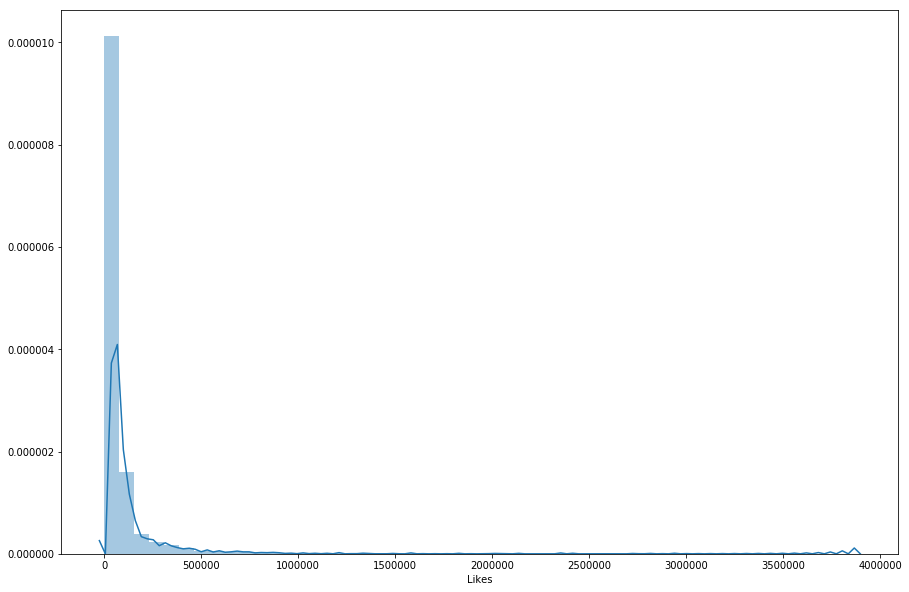

In [15]:
#videos_df = pd.read_pickle('US_trending.pkl')
#videos_df.drop(columns=['disc_likes_x', 'disc_likes_y'], inplace=True)
#videos_df.head()

# distribution of trending video likes
fig, ax = plt.subplots(figsize=(15, 10))
sns.distplot(videos_df['likes'])
ax.set(xlabel='Likes')

In [16]:
# Sort videos by number of likes
sorted_df = videos_df.sort_values(by='likes')
sorted_df.head()

,video_id,title,published_at,channel_id,channel_title,category_id,trending_date,tags,view_count,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,days_in_trending,category_name,publish_to_trend,publishing_hour,publishing_day
4047,_sdn1B0N4k0,NieR Replicant ver.1.22474487139.../ニーア レプリカント...,2020-03-29 06:37:45,UC6SmH9mR82nj28_NNg_rZvA,スクウェア・エニックス,20,2020-03-30,スクウェア･エニックス|スクエニ|SQUARE ENIX|スクエア|ニーア|レプリカント|N...,774153,0,...,0,https://i.ytimg.com/vi/_sdn1B0N4k0/default.jpg,True,True,『NieR Replicant』のバージョンアップ作品、PlayStation®4／Xbox...,5,Gaming,1,6,Sunday
3656,h8OX0FNWANM,Recognizing Ignaz Semmelweis and Handwashing,2020-03-19 10:00:57,UCdq61m8s_48EhJ5OM_MCeGw,GoogleDoodles,27,2020-03-20,handwashing|Ignaz Semmelweis|GoogleDoodle,18318130,0,...,0,https://i.ytimg.com/vi/h8OX0FNWANM/default.jpg,True,True,Today’s Doodle follows the official guidelines...,9,Education,1,10,Thursday
2066,YPHPcDv409c,‘Why didn’t you stay in Mexico?’ Diversity and...,2020-02-03 18:18:45,UClmFQfVyDvdtCralM-Oo_mw,MLive,25,2020-02-06,Saline|auth-NicoleHester-auth|Saline Michigan|...,991107,0,...,11179,https://i.ytimg.com/vi/YPHPcDv409c/default.jpg,False,True,While parent Adrian Iraola was in the middle o...,6,News & Politics,3,18,Monday
1514,tb5JWIGRka4,Get Ready With Us: Kim and Kylie,2020-01-21 22:15:04,UCWkYXtnAuu7VTLPwUcRSB6A,Kylie Jenner,22,2020-01-22,Kylie Cosmetics|Kylie Jenner|Kim Kardashian|Ki...,4423270,0,...,8701,https://i.ytimg.com/vi/tb5JWIGRka4/default.jpg,False,True,I do Kim's makeup using all KKW BEAUTY and Kyl...,10,People & Blogs,1,22,Tuesday
3813,RxH_uHFwj30,Stay Home – Save Lives (Feat. Danny DeVito),2020-03-22 21:36:18,UCLHU6ECVSZbzgcpd113Jk4Q,NYGovCuomo,25,2020-03-24,New York State|Governor Andrew Cuomo,302487,0,...,0,https://i.ytimg.com/vi/RxH_uHFwj30/default.jpg,True,True,Actor Danny DeVito shares Governor Cuomo's mes...,6,News & Politics,2,21,Sunday


In [17]:
classes = 3
step = round(len(videos_df) / classes)
disc_likes = classes * np.ones(len(videos_df))

for i in range(0, len(videos_df)):
    min_limit = 0
    max_limit = step
    for j in range(1, classes):
        if i >= min_limit and i <= max_limit:
            disc_likes[i] = j
            break
        else:
            min_limit = max_limit + 1
            max_limit = min_limit + step - 1

[Text(0.5, 0, 'Discrete values of likes')]

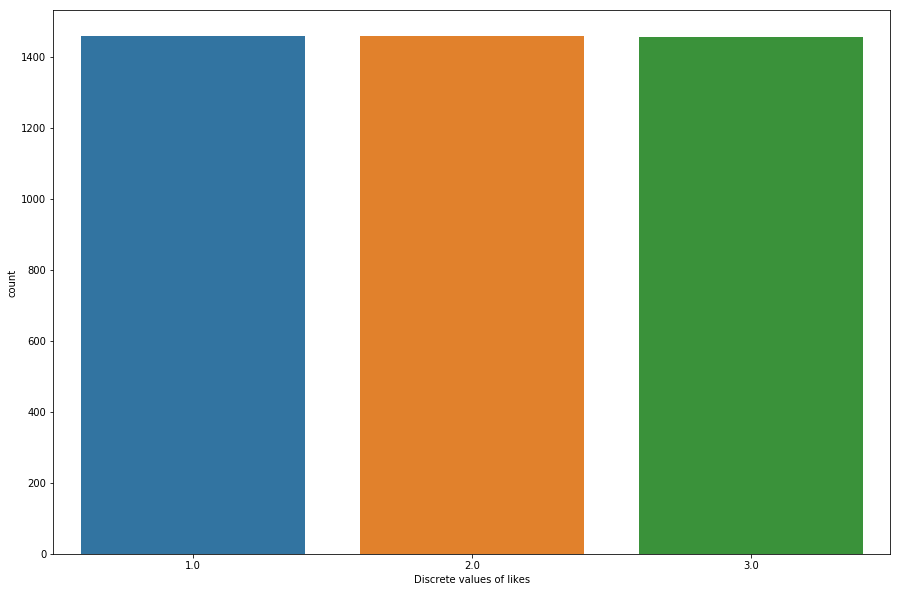

In [18]:
# distribution of trending video likes (after discretization)
fig, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x=disc_likes)
#sns.distplot(disc_likes)
ax.set(xlabel='Discrete values of likes')

In [19]:
# add discrete value of likes to dataframe
sorted_df['disc_likes'] = disc_likes

# sorted_df now has two columns -> video_id and disc_likes
sorted_df = sorted_df[['video_id', 'disc_likes']]
sorted_df.head()

,video_id,disc_likes
4047,_sdn1B0N4k0,1.0
3656,h8OX0FNWANM,1.0
2066,YPHPcDv409c,1.0
1514,tb5JWIGRka4,1.0
3813,RxH_uHFwj30,1.0


In [20]:
# Merge original dataframe (videos_df) with sorted_df
videos_df = pd.merge(videos_df, sorted_df, on=['video_id'])
videos_df.head()

,video_id,title,published_at,channel_id,channel_title,category_id,trending_date,tags,view_count,likes,...,thumbnail_link,comments_disabled,ratings_disabled,description,days_in_trending,category_name,publish_to_trend,publishing_hour,publishing_day,disc_likes
0,vPx6M7eTYbc,Spill Your Guts: Harry Styles & Kendall Jenner,2019-12-11 07:08:34,UCJ0uqCI0Vqr2Rrt1HseGirg,The Late Late Show with James Corden,24,2019-12-12,The Late Late Show|Late Late Show|James Corden...,11636632,571835,...,https://i.ytimg.com/vi/vPx6M7eTYbc/default.jpg,False,False,Late Late Show guest host Harry Styles challen...,1,Entertainment,1,7,Wednesday,3.0
1,sg8WaeeFyNY,WE GOT UNEXPECTED NEWS..,2019-12-12 05:25:42,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2019-12-12,[none],423215,52780,...,https://i.ytimg.com/vi/sg8WaeeFyNY/default.jpg,False,False,Hi babygirls! Thank you so much for watching ...,7,How-to & Style,0,5,Thursday,3.0
2,q1PR05q8l2g,"Last To Miss Layup Wins $10,000",2019-12-11 23:00:53,UCQIUhhcmXsu6cN6n3y9-Pww,Jesser,17,2019-12-12,last to leave|nba basketball|nba basketball hi...,463685,20178,...,https://i.ytimg.com/vi/q1PR05q8l2g/default.jpg,False,False,"Last to miss the basketball shot wins 10,000!●...",7,Sport,1,23,Wednesday,2.0
3,t6Z6RIXq0L0,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2019-12-12 02:35:33,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2019-12-12,sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...,659579,4605,...,https://i.ytimg.com/vi/t6Z6RIXq0L0/default.jpg,False,False,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2,Sport,0,2,Thursday,1.0
4,TGDpRB4ovvA,TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...,2019-12-12 02:38:37,UCtj45MepAoKxZoyR_Mnt86Q,Royal Family,24,2019-12-12,queen Naija|Medicine|Queen|Spicy|Royalty Squad...,175558,18400,...,https://i.ytimg.com/vi/TGDpRB4ovvA/default.jpg,False,False,LAST VIDEO ; https://youtu.be/okujHUu_hmQ*MAKE...,6,Entertainment,0,2,Thursday,2.0


# Comments sentiment analysis

## Collecting comments for each video

In [21]:
#kljuc je id video,  vrednost predstavlja niz komentara za taj video
print(datetime.now())
videos_comments=dict() #recnik gde ce kljuc biti video id a vrednost niz komentara

#inicijalizacija recnika sa id videoa i komentarima
for v in videos:
    videos_comments[v]=[]

dfs_list=list(dfs.values())

empty_comments=dict()
comments_id=[]
# u obzir dolaze videi koji su usli i izasli iz trendinga za vreme skupljanja podataka

j=0
for df in dfs_list:    #iteriramo kroz foldere u kojima se nalaze fajlovi s komentarima za video                        
    comments_date_str=df.iloc[0].trending_date  
    comments_dir_path='../US_Datasets/'+comments_date_str+'_US' #ovde formiramo putanju do foledera gde se nalazi fajlovi sa komentarima 
    
    j=j+1
    
    for file in os.listdir(comments_dir_path):  #iteriramo kroz sve fajlove unutar foldera
        comments=[]        #ovde cemo smestiti sve komentare nekog videa
        hasContent=True    #sluzi za proveru da li fajl ima sadrzaj.(fajlovi sa 1kb)
        
        
        #naziv fajla s komentarima je Comments_"video_Id".json
        videoId=file[9:]
        videoId=videoId[:-5]

        if videoId in videos:    #provera da li imamo video i data frame 
            
            with open(comments_dir_path+'/'+file, "r") as read_file:
                data = json.load(read_file)
                comments=data
                if len(comments) == 0:
                    hasContent=False
                    empty_comments[videoId]=1

            if hasContent:

                if videoId in empty_comments:
                    empty_comments.pop(videoId,None)


                for comment in comments: 
                    tempDate=''
                    tempDate=comment['snippet']['topLevelComment']['snippet']['publishedAt'].split('T')[0]
                    tempDate=tempDate.split('-')
                    commentDate=datetime(int(tempDate[0]), int(tempDate[1]), int(tempDate[2])).date()
                    videoTrendingDate=videos[comment['snippet']['videoId']].trending_date
                    videoTrendingDate=datetime.strptime(videoTrendingDate, '%y.%d.%m').date()

                    commentId=comment['id']

                    if commentDate<=videoTrendingDate and commentId not in comments_id:
                        videos_comments[videoId].append(comment['snippet']['topLevelComment']['snippet']['textOriginal'])
                        comments_id.append(commentId)
#                     if len(video_comments) > 0:
#                         videos_comments[videoId]=video_comments
print('================================================================================')
print(datetime.now())


2020-04-11 10:50:59.800784
2020-04-11 15:08:35.373974


In [22]:
#PROVERA KOLIKO OD KOLIKO VIDEA NEMAMO KOMENTARA
print('Imamo videa:')
print(len(videos))
print('Videos_comments:')
print(len(videos_comments))
print('Nemaju komentare sledeci id:')
i=0
for v in videos_comments:  
    if len(videos_comments[v])== 0:
        i=i+1
        print(v)
        
print('Ukupno nema komentara')
print(i)

Imamo videa:
4370
Videos_comments:
4370
Nemaju komentare sledeci id:
aS_dFYGKoKg
-pM-GaLh5v0
hPZDZsHShwg
7iPyz6Yqwl4
T1qjjr2V-7g
4i1SnSrOLek
iA9F3pfoVXY
b3vJRFYGCOw
E5orqSr_rok
BDjNG2LQRfM
jlOncGequ8o
bsoGh1czMGw
I9t6YW3o-xc
uPS1qFK6PAM
5SnKP_jjWKg
GtXO5CL-tc0
amdbtHvSeeA
n-CzwR9bDA4
ScehDdDzPyI
VPHv8plPnNk
qBNVadmFj-c
_6jcZH6uq1Q
6KdLcd-sUQA
wRJL46wWfUY
BgTsKiZODZU
BCf5gsl3C08
mB31x23bB5g
TzMyhoKQ294
OHQJeCeQnFM
6CqGuFVPH4I
pke0Zx4xocM
XquCCHJuZDE
rdoXYZBWzXk
CABVnXoe9gw
SRuQzlVjOSM
BCJ3N4l-vyw
lBZikjecU28
soRjcajliHE
sdMzNTlUVbI
6r8eahVpQgc
NkMTKGM-efw
kjtoZhVJBSE
6ka_rPvE2J0
fc2YDa7FOjw
rXKRd1cYPm4
xFC7llFS5CQ
L3XnKr0lvDw
cx-5Dm9PGKw
M0eFWoU4CEA
4OnwUz-I2GI
nHttheXCeTw
pgguJ-XYkXY
6rQy5wgfHa0
jehluGQyFLM
_IlZu9X9W_k
8849UFQu2RQ
N20bMsFqv0o
Oqd84F6R33g
CoDPTJ-3qCM
mMhCdIat_RY
f9YX36nHKYo
D6bGVWV-Yqg
lIlMtVGI5Pg
v3KrapfMXqU
Qa6ShFwhNWU
sLuAYsPUKic
VKqC5w207O4
y-eIhBThlrY
RQwX_UkJbDY
14Qsc7WfqJI
RIuk23XHYj0
al5aNl0z2lg
SUrK9cm8v_8
3ZhYjN0jBhc
8yXklHzswM8
VicXpIAOQQw
FOJ7JAUK6EU
6iKtijQ

In [23]:
#KOLIKO VIDEA UOPSTE NEMA KOMENTARE fajlovi s komentarima su prazni
print('Nemaju komentara:')
print(len(empty_comments))
print('================================================')
for v in videos:
    if v not in empty_comments and v not in videos_comments or len(videos_comments[v])==0:
        print(v)

Nemaju komentara:
1000
aS_dFYGKoKg
-pM-GaLh5v0
hPZDZsHShwg
7iPyz6Yqwl4
T1qjjr2V-7g
4i1SnSrOLek
iA9F3pfoVXY
b3vJRFYGCOw
E5orqSr_rok
BDjNG2LQRfM
jlOncGequ8o
bsoGh1czMGw
I9t6YW3o-xc
uPS1qFK6PAM
5SnKP_jjWKg
GtXO5CL-tc0
amdbtHvSeeA
n-CzwR9bDA4
ScehDdDzPyI
VPHv8plPnNk
qBNVadmFj-c
_6jcZH6uq1Q
6KdLcd-sUQA
wRJL46wWfUY
BgTsKiZODZU
BCf5gsl3C08
mB31x23bB5g
TzMyhoKQ294
OHQJeCeQnFM
6CqGuFVPH4I
pke0Zx4xocM
XquCCHJuZDE
rdoXYZBWzXk
CABVnXoe9gw
SRuQzlVjOSM
BCJ3N4l-vyw
lBZikjecU28
soRjcajliHE
sdMzNTlUVbI
6r8eahVpQgc
NkMTKGM-efw
kjtoZhVJBSE
6ka_rPvE2J0
fc2YDa7FOjw
rXKRd1cYPm4
xFC7llFS5CQ
L3XnKr0lvDw
cx-5Dm9PGKw
M0eFWoU4CEA
4OnwUz-I2GI
nHttheXCeTw
pgguJ-XYkXY
6rQy5wgfHa0
jehluGQyFLM
_IlZu9X9W_k
8849UFQu2RQ
N20bMsFqv0o
Oqd84F6R33g
CoDPTJ-3qCM
mMhCdIat_RY
f9YX36nHKYo
D6bGVWV-Yqg
lIlMtVGI5Pg
v3KrapfMXqU
Qa6ShFwhNWU
sLuAYsPUKic
VKqC5w207O4
y-eIhBThlrY
RQwX_UkJbDY
14Qsc7WfqJI
RIuk23XHYj0
al5aNl0z2lg
SUrK9cm8v_8
3ZhYjN0jBhc
8yXklHzswM8
VicXpIAOQQw
FOJ7JAUK6EU
6iKtijQBSF8
CnTGWvHr2Wo
7vmMCwyEF8Q
lVJPrwvQees
ouPNH

## Sentiment Analyzis

### TextBlob sentiment analysis  

In [18]:
# #nltk.download('punkt')
# # nltk.download('wordnet')

# stop_words = set(stopwords.words('english'))
# lemmatizer = WordNetLemmatizer() 

# comments_sentiments=dict()
# for videoId in videos_comments:
#     positive=0
#     negative=0
#     neutral=0
    
#     for comment in videos_comments[videoId]:
# #         print(comment)
#         comment = comment.lower() #to lowerCase sve reci u komentaru
#         comment = re.sub('[^A-Za-z]+', ' ', comment)  #izbacuje brojeve, znakove interpukcije i sve sto nisu slova i brojevi
#         word_tokens = word_tokenize(comment)    #tokenizacija reci
#         stopped = [w for w in word_tokens if not w in stop_words]  #izbacivanje stop reci npr.: a, the, there
       
#         comment = ' '.join(lemmatizer.lemmatize(stopp) for stopp in stopped)    # lematizacija reci
        
#         blob=TextBlob(comment)
#         result=blob.sentiment.polarity
        
#         if result > 0:
#             positive=positive+1
#         elif result < 0:
#             negative=negative+1
#         else:
#             neutral=neutral+1
# #         print(comment)
# #         print(result)
# #         print('========================================')
# #     print(len(videos_comments[videoId]))
# #     print(videoId)
#     countComments=len(videos_comments[videoId])
# #     posRel=positive/countComments
# #     negRel=negative/countComments
# #     neuRel=neutral/countComments
#     if countComments > 0:
#         posRel=positive/countComments
#         negRel=negative/countComments
#         neuRel=neutral/countComments
#     else:
#         posRel=None
#         negRel=None
#         neuRel=None
# #     print(str(posRel))
# #     print(str(negRel))
# #     print(str(neuRel))
#     comments_sentiments[videoId]=[posRel, negRel, neuRel, countComments]
# #     print(comments_sentiments)
# #     print('=======================================')
# #     break


### Vader sentiment analysis

In [24]:
def sentiment_analyzer_scores(sentence):
    return analyser.polarity_scores(sentence)
    #print("{:-<40} {}".format(sentence, str(score)))

analyser = SentimentIntensityAnalyzer()
comments_sentiments=dict()

for videoId in videos_comments:
    positive=0
    negative=0
    neutral=0
    
    for comment in videos_comments[videoId]:
        
        score=sentiment_analyzer_scores(comment)
        
        
        if score['compound'] > 0.05:
            positive=positive+1
        elif score['compound'] < -0.05:
            negative=negative+1
        else:
            neutral=neutral+1

    countComments=len(videos_comments[videoId])

    if countComments > 0:
        posRel=positive/countComments
        negRel=negative/countComments
        neuRel=neutral/countComments
    else:
        posRel=None
        negRel=None
        neuRel=None

    comments_sentiments[videoId]=[posRel, negRel, neuRel, countComments]

In [25]:
i=0
for vv in comments_sentiments.values():
    if vv[0]==None:
        i=i+1
print(i)

315


In [26]:
def map_sentiment_in_dataframe(video_id):
    return comments_sentiments[video_id]

func = lambda var: pd.Series(map_sentiment_in_dataframe(var))

videos_df[['positive_sentiment', 'negative_sentiment', 'neutral_sentiment', 'analyzed_comments']] = videos_df['video_id'].apply(func)

In [27]:
# videos_df.head(10)
set(videos_df['category_name'])

{'Autos & Vehicles',
 'Comedy',
 'Education',
 'Entertainment',
 'Film & Animation',
 'Gaming',
 'How-to & Style',
 'Music',
 'News & Politics',
 'Non-profits & Activism',
 'People & Blogs',
 'Pets & Animals',
 'Science & Technology',
 'Sport',
 'Travel & Events'}

# Exporting dataframe to CSV, so that other files can load it

In [28]:
videos_df.to_pickle('US_trending.pkl')  # where to save it, usually as a .pkl

In [29]:
videos_df

,video_id,title,published_at,channel_id,channel_title,category_id,trending_date,tags,view_count,likes,...,days_in_trending,category_name,publish_to_trend,publishing_hour,publishing_day,disc_likes,positive_sentiment,negative_sentiment,neutral_sentiment,analyzed_comments
0,vPx6M7eTYbc,Spill Your Guts: Harry Styles & Kendall Jenner,2019-12-11 07:08:34,UCJ0uqCI0Vqr2Rrt1HseGirg,The Late Late Show with James Corden,24,2019-12-12,The Late Late Show|Late Late Show|James Corden...,11636632,571835,...,1,Entertainment,1,7,Wednesday,3.0,0.468750,0.131250,0.400000,160.0
1,sg8WaeeFyNY,WE GOT UNEXPECTED NEWS..,2019-12-12 05:25:42,UCDSJCBYqL7VQrlXfhr1RtwA,Les Do Makeup,26,2019-12-12,[none],423215,52780,...,7,How-to & Style,0,5,Thursday,3.0,0.750000,0.075000,0.175000,40.0
2,q1PR05q8l2g,"Last To Miss Layup Wins $10,000",2019-12-11 23:00:53,UCQIUhhcmXsu6cN6n3y9-Pww,Jesser,17,2019-12-12,last to leave|nba basketball|nba basketball hi...,463685,20178,...,7,Sport,1,23,Wednesday,2.0,0.318182,0.181818,0.500000,88.0
3,t6Z6RIXq0L0,LAKERS at MAGIC | FULL GAME HIGHLIGHTS | Decem...,2019-12-12 02:35:33,UCWJ2lWNubArHWmf3FIHbfcQ,NBA,17,2019-12-12,sp:ty=high|sp:dt=2019-12-12T00:00:00Z|sp:st=ba...,659579,4605,...,2,Sport,0,2,Thursday,1.0,0.462069,0.193103,0.344828,145.0
4,TGDpRB4ovvA,TIPPING DRIVE-THRU WORKERS $100 FOR THE HOLIDA...,2019-12-12 02:38:37,UCtj45MepAoKxZoyR_Mnt86Q,Royal Family,24,2019-12-12,queen Naija|Medicine|Queen|Spicy|Royalty Squad...,175558,18400,...,6,Entertainment,0,2,Thursday,2.0,0.631250,0.131250,0.237500,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4365,Ze9jxpur47M,Claire Makes Sourdough Crêpes Suzette | It's A...,2020-04-03 16:03:30,UCbpMy0Fg74eXXkvxJrtEn3w,Bon Appétit,26,2020-04-08,it's alive|it's alive bon appetit|brad leone|w...,2509672,101603,...,2,How-to & Style,5,16,Friday,3.0,0.537688,0.085427,0.376884,199.0
4366,ogv284C4W30,"Kygo, Sasha Sloan - I'll Wait (Lyric Video)",2020-04-03 04:00:15,UCYpVqLSvfseUqb2URAkexlw,KygoOfficialVEVO,10,2020-04-08,Kygo - I’ll Wait ft. Sasha Sloan|Kygo I’ll Wai...,2248932,141037,...,2,Music,5,4,Friday,3.0,0.514706,0.098039,0.387255,204.0
4367,xeIwKpqoK8c,Stuntmen React To Bad & Great Hollywood Stunts 13,2020-04-04 16:00:34,UCSpFnDQr88xCZ80N-X7t0nQ,Corridor Crew,24,2020-04-08,Breakdown|Analysis|behind the scenes|bts|Actio...,1192039,61282,...,1,Entertainment,4,16,Saturday,3.0,0.511111,0.211111,0.277778,180.0
4368,b3ZjhNG_BrM,Just Escaped Slavery/Meeting President Obama ...,2020-04-02 14:00:11,UC8bTQzxgvKkXDAaWkeuUlkg,Trevor Noah,23,2020-04-08,Trevor Noah|Trevor Noah Comedy Central|The Dai...,935133,28959,...,1,Comedy,6,14,Thursday,2.0,0.488889,0.238889,0.272222,180.0
